In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfattacks_BS1  = pd.read_csv("BTS_1.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", 
                                                            "dDSb", "sTtl", "dTtl", "sHops", "dHops","Cause","TotPkts","SrcPkts","DstPkts","TotBytes",
                                                            "SrcBytes","DstBytes", "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad",
         "Loss","SrcLoss", "DstLoss", "pLoss", "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False,  header=0)
dfattacks_BS2  = pd.read_csv("BTS_2.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", "dDSb",
                                                            "sTtl", "dTtl", "sHops", "dHops", "Cause","TotPkts","SrcPkts","DstPkts","TotBytes","SrcBytes","DstBytes",
                                                            "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad","Loss","SrcLoss", "DstLoss", "pLoss",
                                                            "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False, header=0)

#tcp AckDat sHops Seq RST TcpRtt REQ dMeanPktSz Offset CON FIN sTtl e INT Mean Status icmp SrcTCPBase ed sMeanPktSz DstLoss Loss dTtl SrcBytes TotBytes
#proto
#State 

In [3]:
dfattacks_BS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728316 entries, 0 to 728315
Data columns (total 52 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flgs         728316 non-null  object 
 1   Seq          728316 non-null  int64  
 2   Dur          728316 non-null  float64
 3   RunTime      728316 non-null  float64
 4   Mean         728316 non-null  float64
 5   Sum          728316 non-null  float64
 6   Min          728316 non-null  float64
 7   Max          728316 non-null  float64
 8   Proto        728316 non-null  object 
 9   sTos         728116 non-null  float64
 10  dTos         146863 non-null  float64
 11  sDSb         728116 non-null  object 
 12  dDSb         146863 non-null  object 
 13  sTtl         728116 non-null  float64
 14  dTtl         146863 non-null  float64
 15  sHops        728116 non-null  float64
 16  dHops        146863 non-null  float64
 17  Cause        728316 non-null  object 
 18  TotPkts      728316 non-

In [4]:
dfattacks_BS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487574 entries, 0 to 487573
Data columns (total 52 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flgs         487574 non-null  object 
 1   Seq          487574 non-null  int64  
 2   Dur          487574 non-null  float64
 3   RunTime      487574 non-null  float64
 4   Mean         487574 non-null  float64
 5   Sum          487574 non-null  float64
 6   Min          487574 non-null  float64
 7   Max          487574 non-null  float64
 8   Proto        487574 non-null  object 
 9   sTos         487560 non-null  float64
 10  dTos         125960 non-null  float64
 11  sDSb         487560 non-null  object 
 12  dDSb         125960 non-null  object 
 13  sTtl         487560 non-null  float64
 14  dTtl         125960 non-null  float64
 15  sHops        487560 non-null  float64
 16  dHops        125960 non-null  float64
 17  Cause        487574 non-null  object 
 18  TotPkts      487574 non-

In [5]:
dfattacks_BS1.describe()

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
count,728316.000000,728316.000000,728316.000000,728316.000000,728316.000000,728316.000000,728316.000000,728116.000000,146863.000000,728116.000000,...,7.283160e+05,1.252690e+05,9.079700e+04,72986.0,753.0,1.455010e+05,1.196160e+05,728316.000000,728316.000000,728316.000000
mean,51282.395176,1.426883,1.426883,1.426883,1.426883,1.426883,1.426883,0.753969,2.836971,82.136318,...,5.327791e+02,1.100917e+06,6.977458e+04,610.0,610.0,2.032239e+09,2.143869e+09,0.004013,0.000387,0.003626
std,42867.611959,1.750249,1.750249,1.750249,1.750249,1.750249,1.750249,11.620346,22.069261,56.768312,...,5.463027e+04,5.615949e+06,1.927221e+05,0.0,0.0,1.238678e+09,1.244851e+09,0.011560,0.004455,0.009933
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,610.0,610.0,2.310820e+05,4.385080e+05,0.000000,0.000000,0.000000
25%,10953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,...,0.000000e+00,5.670400e+04,6.476800e+04,610.0,610.0,9.914339e+08,1.070841e+09,0.000000,0.000000,0.000000
50%,36820.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,...,0.000000e+00,6.259200e+04,6.489600e+04,610.0,610.0,1.927080e+09,2.152925e+09,0.000000,0.000000,0.000000
75%,90470.000000,2.581113,2.581113,2.581113,2.581113,2.581113,2.581113,0.000000,0.000000,63.000000,...,0.000000e+00,6.425600e+04,6.502400e+04,610.0,610.0,3.102191e+09,3.223245e+09,0.000000,0.000000,0.000000
max,137210.000000,19.920630,19.920630,19.920630,19.920630,19.920630,19.920630,224.000000,186.000000,255.000000,...,8.000000e+06,3.355392e+07,1.677696e+07,610.0,610.0,4.294967e+09,4.294950e+09,1.027732,1.024341,0.266729


In [6]:
dfattacks_BS2.describe()

,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,sTtl,...,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
count,487574.000000,487574.000000,487574.000000,487574.000000,487574.000000,487574.000000,487574.000000,487560.000000,125960.000000,487560.000000,...,4.875740e+05,1.171510e+05,8.628100e+04,41585.0,1256.0,1.331700e+05,1.104310e+05,487574.000000,487574.000000,487574.000000
mean,24003.066232,1.272165,1.272165,1.272165,1.272165,1.272165,1.272165,1.029272,2.405129,80.436203,...,4.509516e+02,7.161359e+05,6.923846e+04,610.0,610.0,2.057368e+09,2.148942e+09,0.005650,0.000872,0.004779
std,19161.948365,1.594701,1.594701,1.594701,1.594701,1.594701,1.594701,13.750395,19.764075,54.630005,...,5.935736e+04,4.213723e+06,2.115531e+05,0.0,0.0,1.227540e+09,1.241707e+09,0.023584,0.019882,0.011342
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,610.0,610.0,1.230730e+05,3.308900e+04,0.000000,0.000000,0.000000
25%,6670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,...,0.000000e+00,5.657600e+04,6.476800e+04,610.0,610.0,9.809150e+08,1.070984e+09,0.000000,0.000000,0.000000
50%,20365.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,...,0.000000e+00,6.259200e+04,6.489600e+04,610.0,610.0,2.023513e+09,2.150991e+09,0.000000,0.000000,0.000000
75%,38444.000000,2.579855,2.579855,2.579855,2.579855,2.579855,2.579855,0.000000,0.000000,63.000000,...,0.000000e+00,6.425600e+04,6.502400e+04,610.0,610.0,3.081986e+09,3.226468e+09,0.000000,0.000000,0.000000
max,68465.000000,5.978457,5.978457,5.978457,5.978457,5.978457,5.978457,224.000000,186.000000,255.000000,...,2.600000e+07,3.355392e+07,1.677696e+07,610.0,610.0,4.294967e+09,4.294956e+09,1.051236,1.024680,0.236444


In [7]:
dfattacks_BS1.isnull().values.any()

True

In [8]:
dfattacks_BS2.isnull().values.any()

True

In [9]:
dfattacks_BS1 = dfattacks_BS1.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [10]:
dfattacks_BS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728316 entries, 0 to 728315
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flgs         728316 non-null  object 
 1   Seq          728316 non-null  int64  
 2   Dur          728316 non-null  float64
 3   RunTime      728316 non-null  float64
 4   Mean         728316 non-null  float64
 5   Sum          728316 non-null  float64
 6   Min          728316 non-null  float64
 7   Max          728316 non-null  float64
 8   Proto        728316 non-null  object 
 9   sTos         728116 non-null  float64
 10  sDSb         728116 non-null  object 
 11  sTtl         728116 non-null  float64
 12  sHops        728116 non-null  float64
 13  Cause        728316 non-null  object 
 14  TotPkts      728316 non-null  int64  
 15  SrcPkts      728316 non-null  int64  
 16  DstPkts      728316 non-null  int64  
 17  TotBytes     728316 non-null  int64  
 18  SrcBytes     728316 non-

In [11]:
dfattacks_BS2 = dfattacks_BS2.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [12]:
dfattacks_BS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487574 entries, 0 to 487573
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flgs         487574 non-null  object 
 1   Seq          487574 non-null  int64  
 2   Dur          487574 non-null  float64
 3   RunTime      487574 non-null  float64
 4   Mean         487574 non-null  float64
 5   Sum          487574 non-null  float64
 6   Min          487574 non-null  float64
 7   Max          487574 non-null  float64
 8   Proto        487574 non-null  object 
 9   sTos         487560 non-null  float64
 10  sDSb         487560 non-null  object 
 11  sTtl         487560 non-null  float64
 12  sHops        487560 non-null  float64
 13  Cause        487574 non-null  object 
 14  TotPkts      487574 non-null  int64  
 15  SrcPkts      487574 non-null  int64  
 16  DstPkts      487574 non-null  int64  
 17  TotBytes     487574 non-null  int64  
 18  SrcBytes     487574 non-

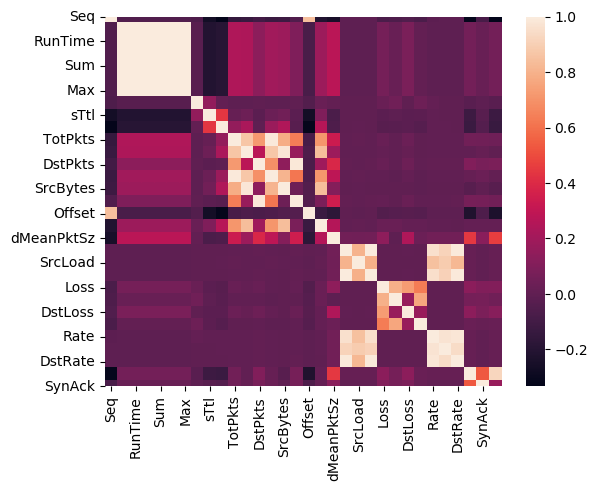

In [13]:
corr_BS1 = dfattacks_BS1.corr(numeric_only=True)
sns.heatmap(corr_BS1)

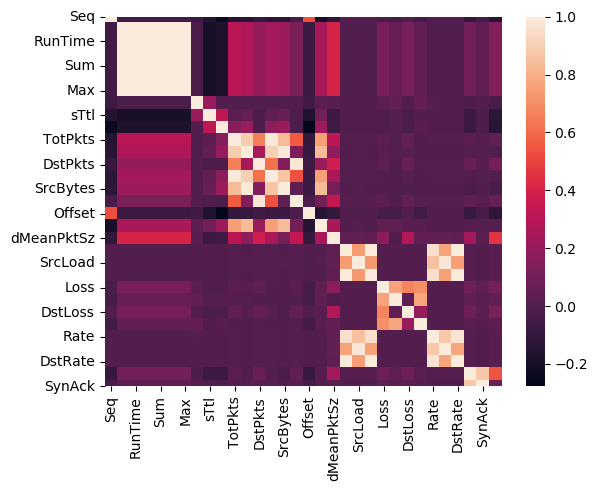

In [14]:
corr_BS2 = dfattacks_BS2.corr(numeric_only=True)
sns.heatmap(corr_BS2)

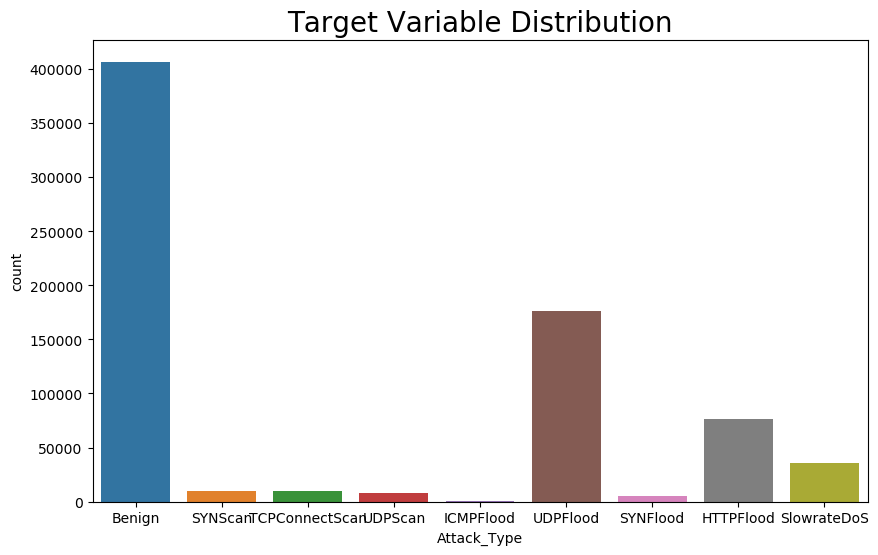

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfattacks_BS1, x="Attack_Type")
plt.title("Target Variable Distribution", fontsize=20)
plt.show()

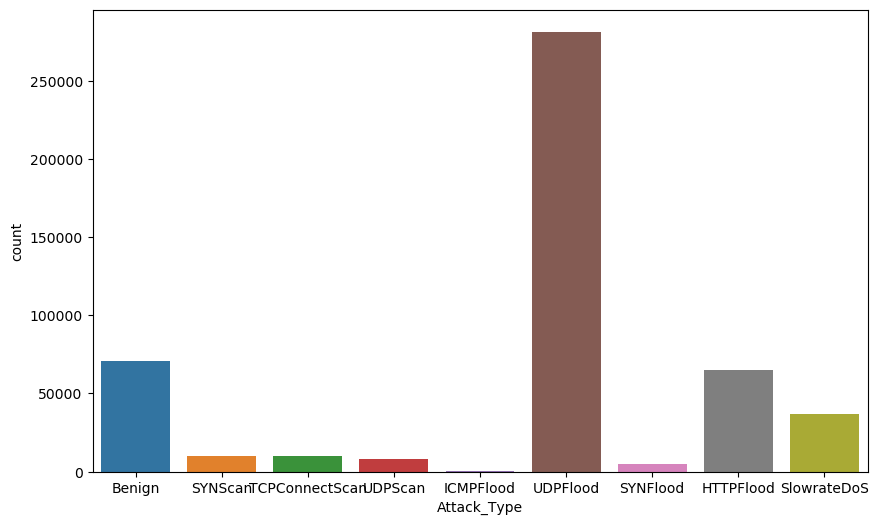

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dfattacks_BS2, x="Attack_Type")
plt.show()

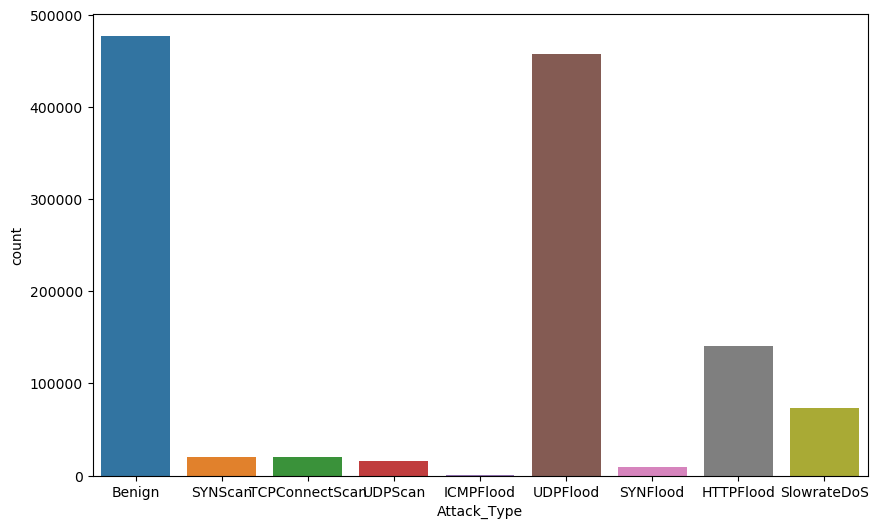

In [17]:
#According to the previous figures, it is a imbalanced data. 
#Combining both datasets
CombBS1_BS2 = pd.concat([dfattacks_BS1, dfattacks_BS2] )

plt.figure(figsize=(10, 6))
sns.countplot(data=CombBS1_BS2, x="Attack_Type")
plt.show()


In [18]:
 CombBS1_BS2.columns

Index(['Flgs', 'Seq', 'Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max', 'Proto',
       'sTos', 'sDSb', 'sTtl', 'sHops', 'Cause', 'TotPkts', 'SrcPkts',
       'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Offset', 'sMeanPktSz',
       'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss',
       'DstLoss', 'pLoss', 'Rate', 'SrcRate', 'DstRate', 'State', 'TcpRtt',
       'SynAck', 'AckDat', 'Label', 'Attack_Type', 'Attack_Tool'],
      dtype='object')

In [19]:
CombBS1_BS2["Proto"]

0         icmp
1         icmp
2          udp
3          udp
4          udp
          ... 
487569    sctp
487570    sctp
487571     tcp
487572    sctp
487573    sctp
Name: Proto, Length: 1215890, dtype: object

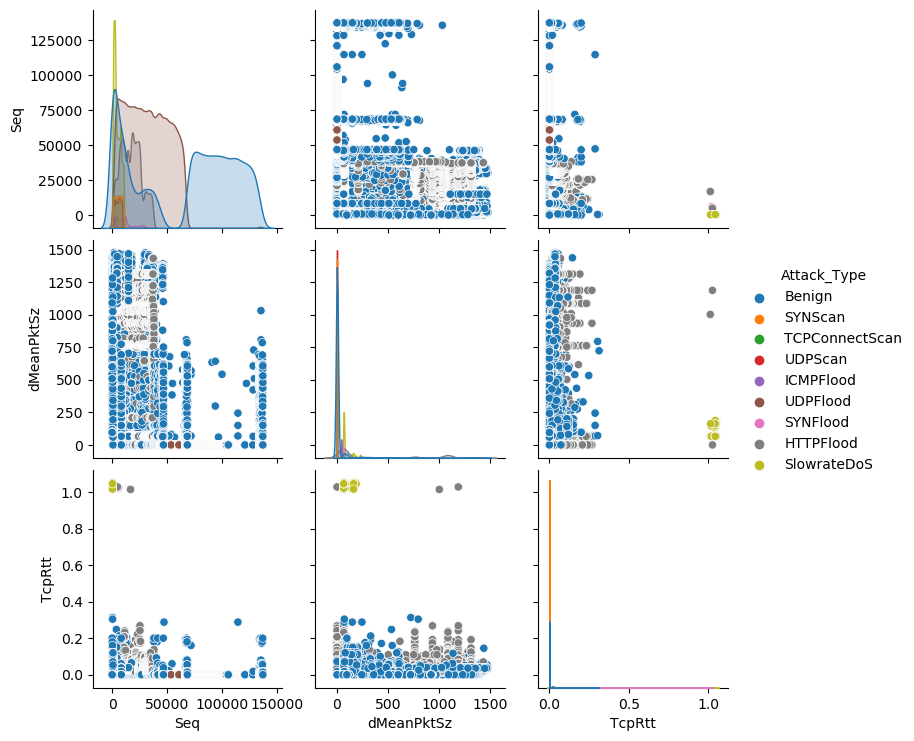

In [20]:
#tcp AckDat sHops Seq RST TcpRtt REQ dMeanPktSz Offset CON FIN sTtl e INT Mean Status icmp SrcTCPBase ed sMeanPktSz DstLoss Loss dTtl SrcBytes TotBytes

features = ["Seq",  "dMeanPktSz", "TcpRtt", "Attack_Type"]
sns.pairplot(CombBS1_BS2[features], hue="Attack_Type")
plt.show()

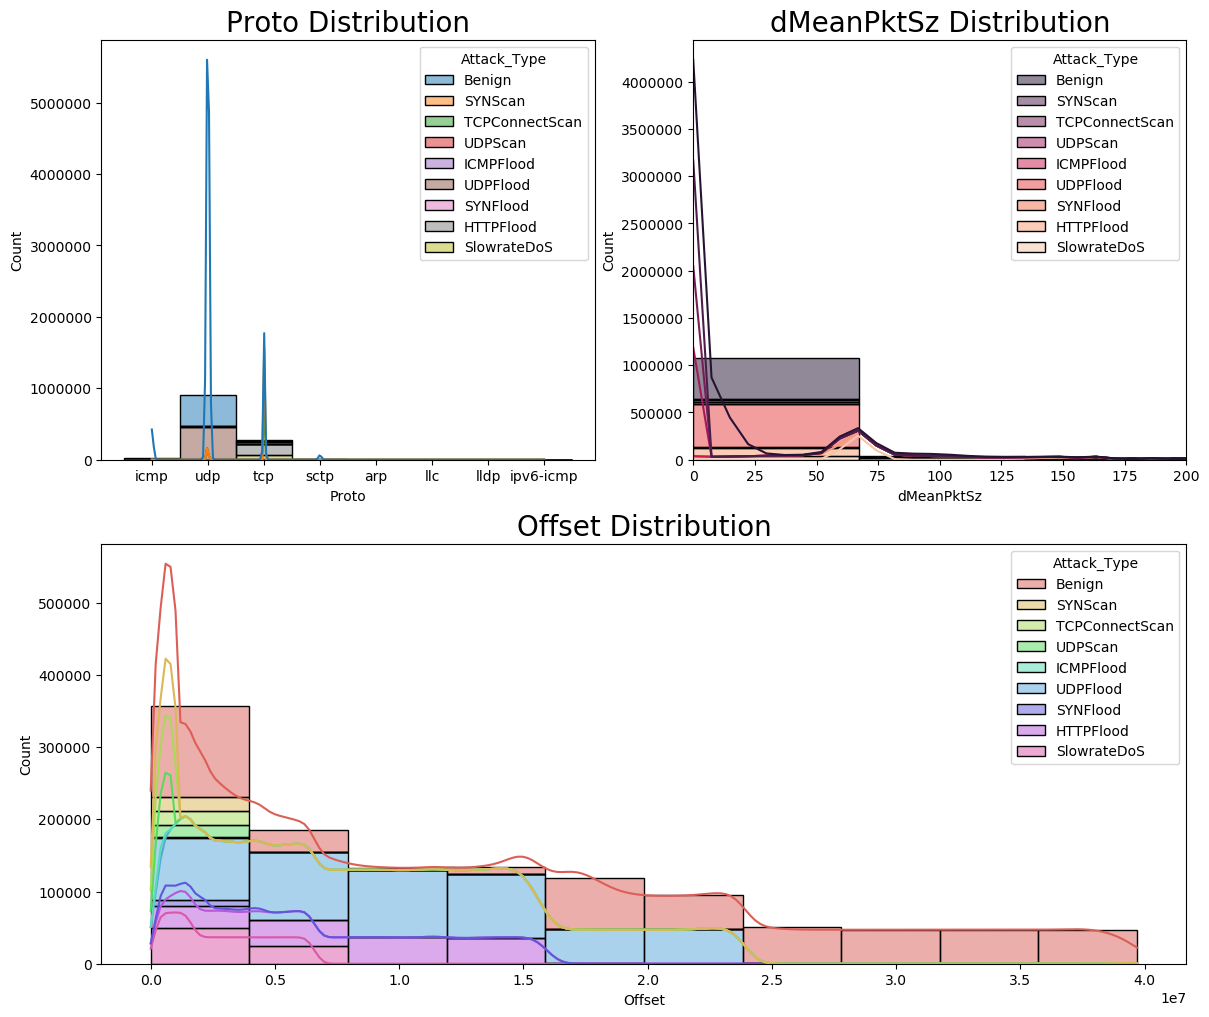

In [23]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=CombBS1_BS2, x='Proto', hue='Attack_Type', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Proto Distribution", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=CombBS1_BS2, x='dMeanPktSz', hue='Attack_Type', multiple='stack', palette='rocket', kde=True)
ax2.set_title("dMeanPktSz Distribution", fontsize=20)
ax2.set_xlim([0,200])

plt.subplot(212)
ax3 = sns.histplot(data=CombBS1_BS2, x='Offset', hue='Attack_Type', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Offset Distribution", fontsize=20)

plt.show()


Text(0, 0.5, 'Seq')

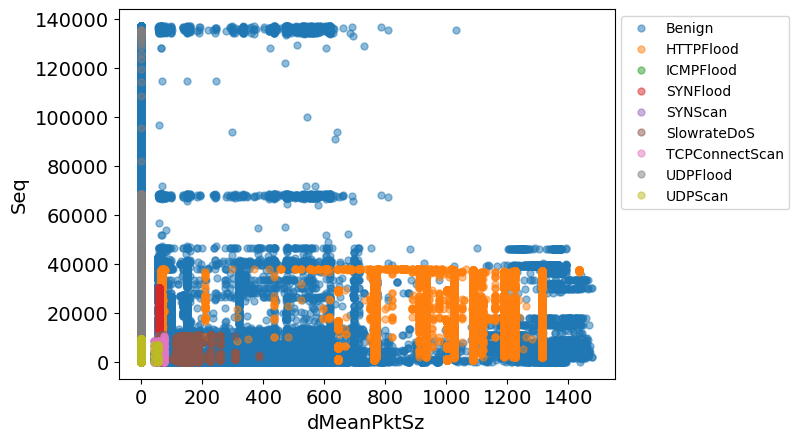

In [41]:
#tcp AckDat sHops Seq RST TcpRtt REQ dMeanPktSz Offset CON FIN sTtl e INT Mean Status icmp SrcTCPBase ed sMeanPktSz DstLoss Loss dTtl SrcBytes TotBytes

CombBS1_BS2.set_index('dMeanPktSz').sort_index().groupby('Attack_Type')['Seq'].plot(style='o', legend=True, ylabel="Seq", alpha=0.5, markersize=5, fontsize=14 )
plt.legend(fontsize=10, bbox_to_anchor=(1, 1))
plt.xlabel("dMeanPktSz", fontsize=14)
plt.ylabel("Seq", fontsize=14)


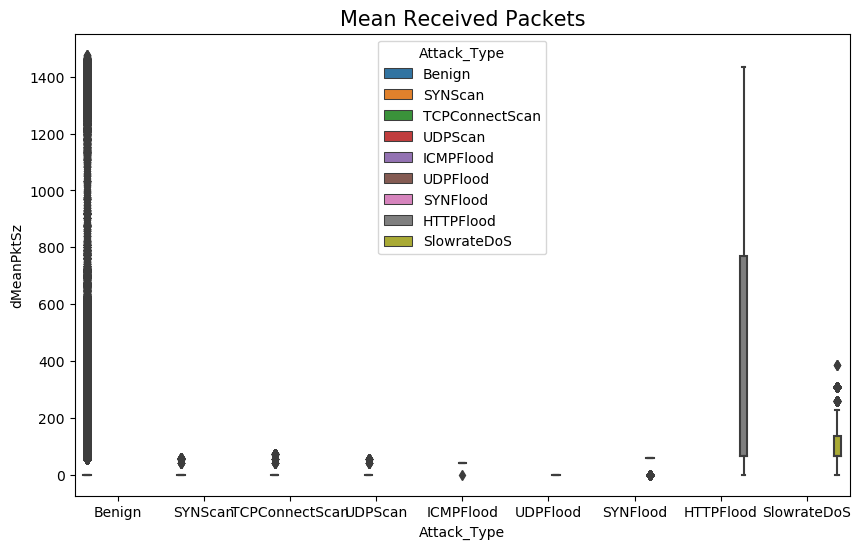

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=CombBS1_BS2, x='Attack_Type', y='dMeanPktSz', hue='Attack_Type')
plt.title("Mean Received Packet Size", fontsize=15)
plt.show()

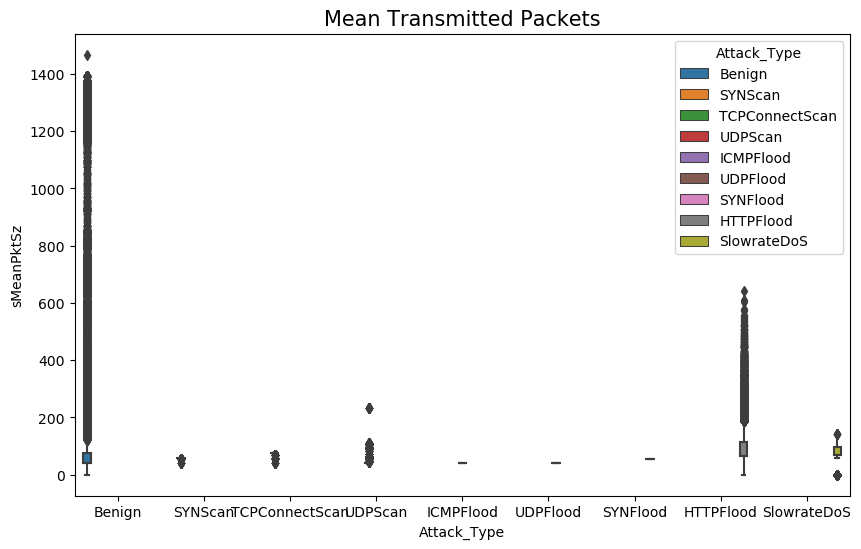

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=CombBS1_BS2, x='Attack_Type', y='sMeanPktSz', hue='Attack_Type')
plt.title("Mean Transmitted Packet Size", fontsize=15)
plt.show()

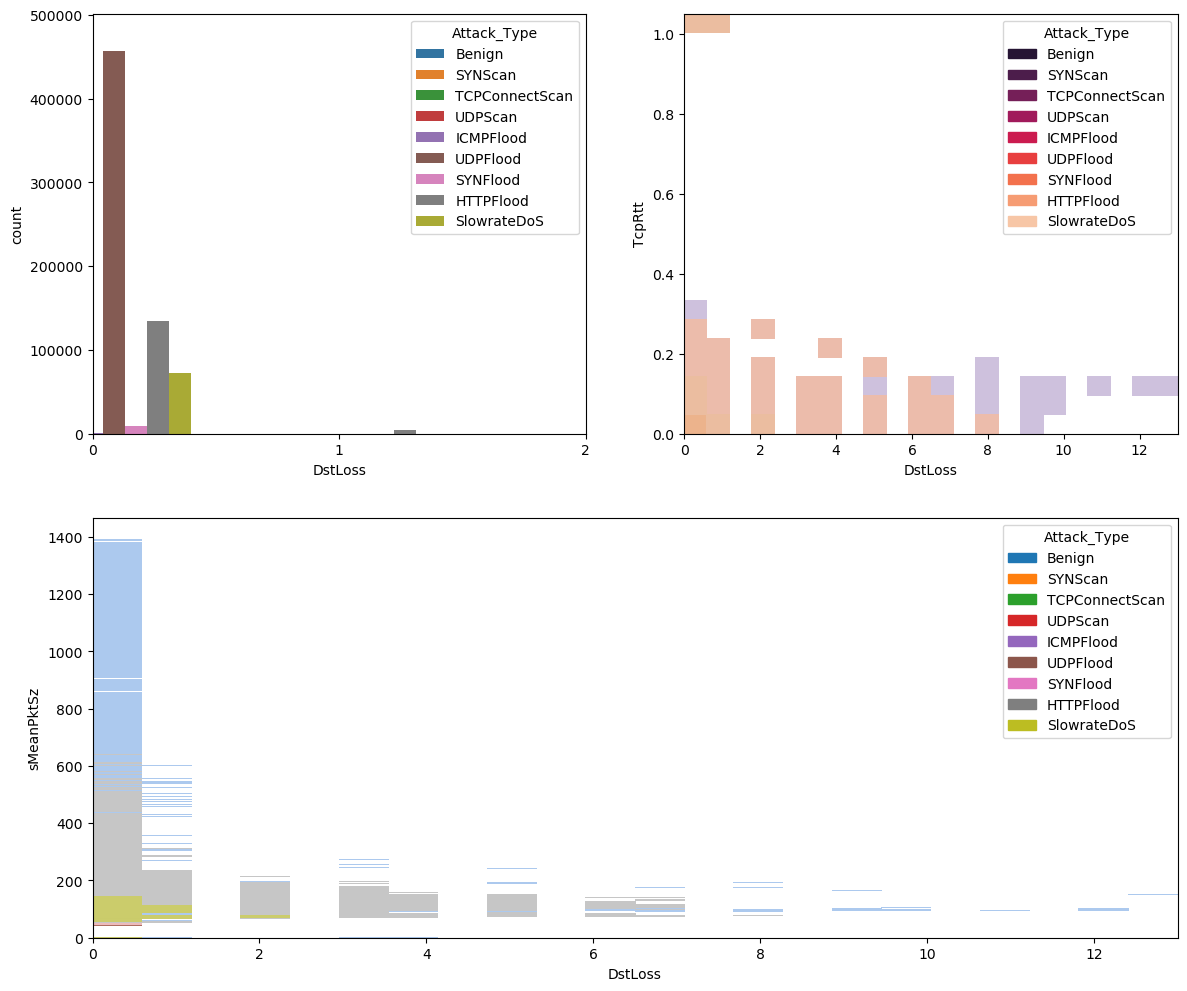

In [53]:
#Seq Offset sTtl e tcp AckDat RST INT TcpRtt icmp sMeanPktSz FIN sHops Mean dTtl 
#SrcBytes TotBytes dMeanPktSz Status cs0 SrcWin sTos ed CON REQ
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=CombBS1_BS2, x='DstLoss', hue='Attack_Type', palette='tab10')
ax1.set_xlim([0,2])

plt.subplot(222)
ax2 = sns.histplot(data=CombBS1_BS2, x='DstLoss', y='TcpRtt', palette='rocket', hue='Attack_Type')

plt.subplot(212)
ax3 = sns.histplot(data=CombBS1_BS2, x='DstLoss', y='sMeanPktSz', hue='Attack_Type')

In [ ]:
#Seq Offset sTtl e tcp AckDat RST INT TcpRtt icmp sMeanPktSz FIN sHops Mean dTtl SrcBytes TotBytes dMeanPktSz Status cs0 SrcWin sTos ed CON REQ

In [ ]:
#tcp AckDat sHops Seq RST TcpRtt REQ dMeanPktSz Offset CON FIN sTtl e INT Mean Status icmp SrcTCPBase ed sMeanPktSz DstLoss Loss dTtl SrcBytes TotBytes